In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem - 1: Getting Started with Data Exploration

In [12]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

print("First 10 rows of the dataset:")
print(df.head(10))

print("\nNumber of rows and columns:")
print(df.shape)

print("\nColumns and their data types:")

df.dtypes.head(10)

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


Calculate the mean, median, and standard deviation for the Score column.


In [13]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

scores = df['score']

mean_score = sum(scores) / len(scores)
sorted_scores = sorted(scores)
n = len(sorted_scores)
if n % 2 == 0:
    median_score = (sorted_scores[n//2 - 1] + sorted_scores[n//2]) / 2
else:
    median_score = sorted_scores[n//2]

mean_diff_squared = [(x - mean_score) ** 2 for x in scores]
variance = sum(mean_diff_squared) / (n - 1)
std_dev_score = variance ** 0.5


print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {std_dev_score}")

Mean: 5.527580419580421
Median: 5.785
Standard Deviation: 1.1707165099442995


Identify the country with the highest and lowest happiness scores.

In [14]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

happiness_column = 'score'
country_column = 'Country name'

highest_happiness = df.loc[df[happiness_column].idxmax()]

lowest_happiness = df.loc[df[happiness_column].idxmin()]

print(f"Country with the highest happiness score: {highest_happiness[country_column]} (Score: {highest_happiness[happiness_column]})")
print(f"Country with the lowest happiness score: {lowest_happiness[country_column]} (Score: {lowest_happiness[happiness_column]})")

Country with the highest happiness score: Finland (Score: 7.741)
Country with the lowest happiness score: Afghanistan (Score: 1.721)


Missing Values:

Check if there are any missing values in the dataset. If so, display the total count for each column.

In [15]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

missing_values = df.isnull().sum()

print("Missing values count for each column:")

missing_values.head(10)

Missing values count for each column:


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [16]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

filtered_df = df[df['score'] > 7.5]

sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

top_10_df = sorted_df.head(10)

top_10_df.head(3)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:
          Low − (Score < 4)
          Medium − (4 ≤ Score ≤ 6)
          High − (Score > 6)

In [17]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

print(df.columns)
df['Happiness Category'] = pd.cut(df['score'], bins=[-float('inf'), 4, 6, float('inf')],
                                  labels=['Low', 'Medium', 'High'], right=True)


df[['Country name', 'score']].head(10)

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


,Country name,score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341
5,Netherlands,7.319
6,Norway,7.302
7,Luxembourg,7.122
8,Switzerland,7.060
9,Australia,7.057


Data Visualizations:

1. Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

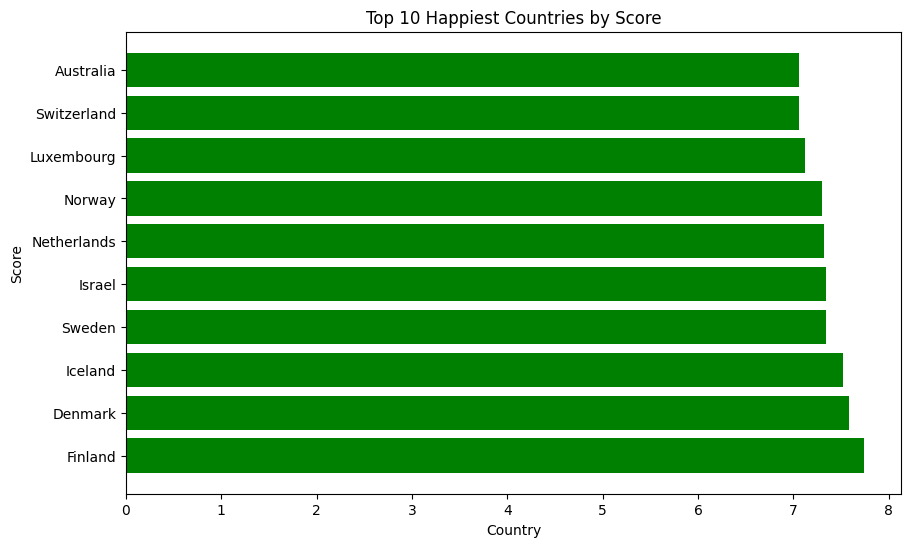

In [18]:

import matplotlib.pyplot as plt

pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

top_10_happy = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_happy['Country name'], top_10_happy['score'], color='green')


plt.ylabel('Score')
plt.xlabel('Country')
plt.title('Top 10 Happiest Countries by Score')

plt.show()

2.Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

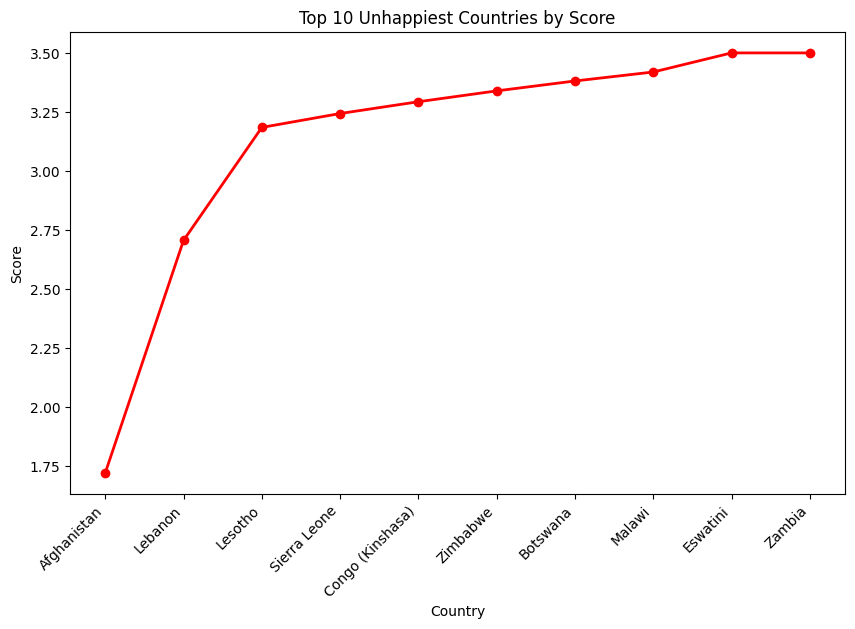

In [19]:
import matplotlib.pyplot as plt
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

top_10_unhappy = df.sort_values(by='score').head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappy['Country name'], top_10_unhappy['score'], marker='o', color='red', linestyle='-', linewidth=2)

plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 Unhappiest Countries by Score')

plt.xticks(rotation=45, ha='right')

plt.show()

3. Plot a histogram for the Score column to show its distribution and also interpret.

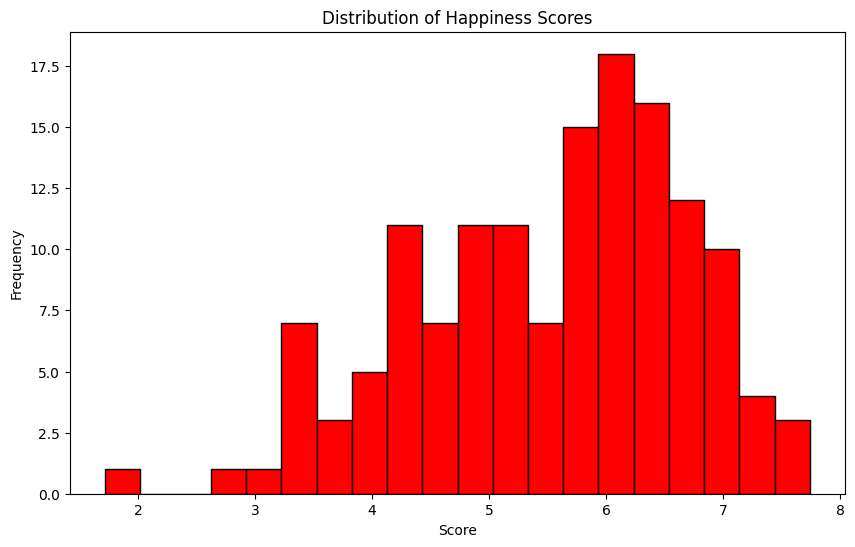

In [20]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='red', edgecolor='black')

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')

plt.show()

Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

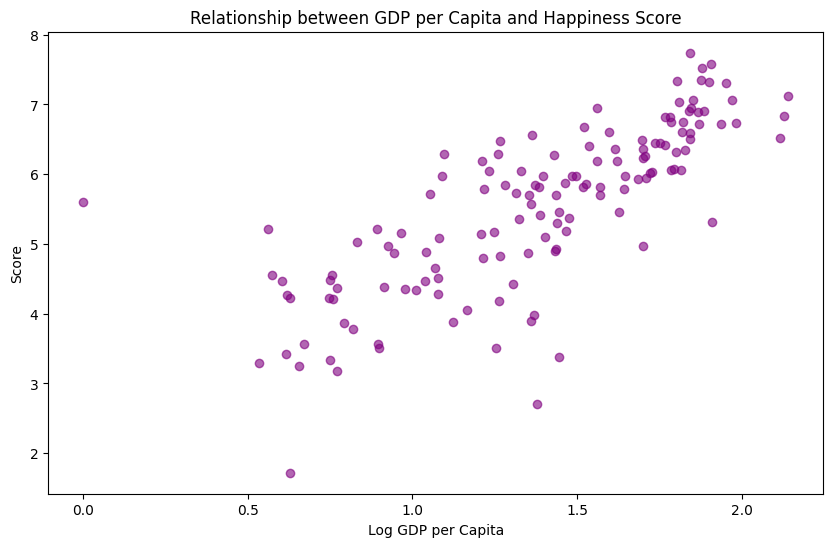

In [21]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='purple', alpha=0.6)

plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Relationship between GDP per Capita and Happiness Score')

plt.show()

Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [22]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asian_df = df[df['Country name'].isin(south_asian_countries)]

south_asian_df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [23]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')
filtered_df = df[~df['Country name'].isin(south_asian_countries)]
filtered_df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


Save the filtered dataframe as separate CSV files for future use.

In [24]:

south_asian_df.to_csv('south_asian_countries.csv', index=False)

Task - 2 - Composite Score Ranking:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support+ 0.30 × Healthy Life Expectancy

In [32]:
south_asian_df = south_asian_df.copy()
south_asian_df.loc[:, 'Composite score'] = (0.40 * south_asian_df['Log GDP per capita'] +
                                             0.30 * south_asian_df['Social support'] +
                                             0.30 * south_asian_df['Healthy life expectancy'])

south_asian_df[['Country name', 'Composite score']].head(6)

,Country name,Composite score
92,Nepal,0.8159
107,Pakistan,0.7039
125,India,0.7874
127,Sri Lanka,1.0739
128,Bangladesh,0.6774
142,Afghanistan,0.3238


2. Rank the South Asian countries based on the Composite Score in descending order.

In [33]:
ranked_south_asian_df = south_asian_df.sort_values(by='Composite score', ascending=False)

ranked_south_asian_df[['Country name', 'Composite score']].head(6)

,Country name,Composite score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

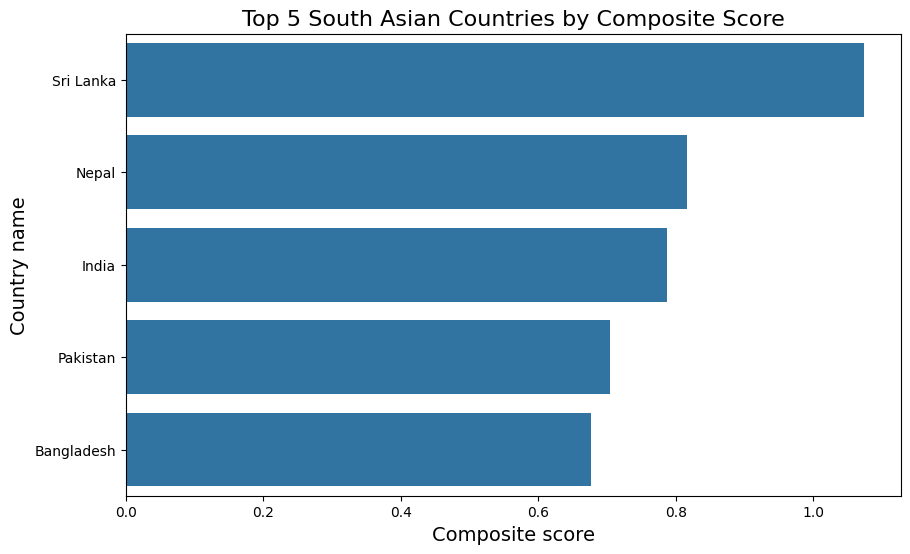

In [34]:
import seaborn as sns


top_5_south_asian_df = south_asian_df.sort_values(by='Composite score', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite score', y='Country name', data=top_5_south_asian_df)

plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Composite score', fontsize=14)
plt.ylabel('Country name', fontsize=14)

plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

Answer:  This bar-Chart shows the comparison of South-Asian countries as per their happiness score and
composite score. Looking forward for the scores we can see that Bangladesh, Afghanistan and
India have the same score where in context of Nepal and Pakistan there is a huge gap between
two scores.  

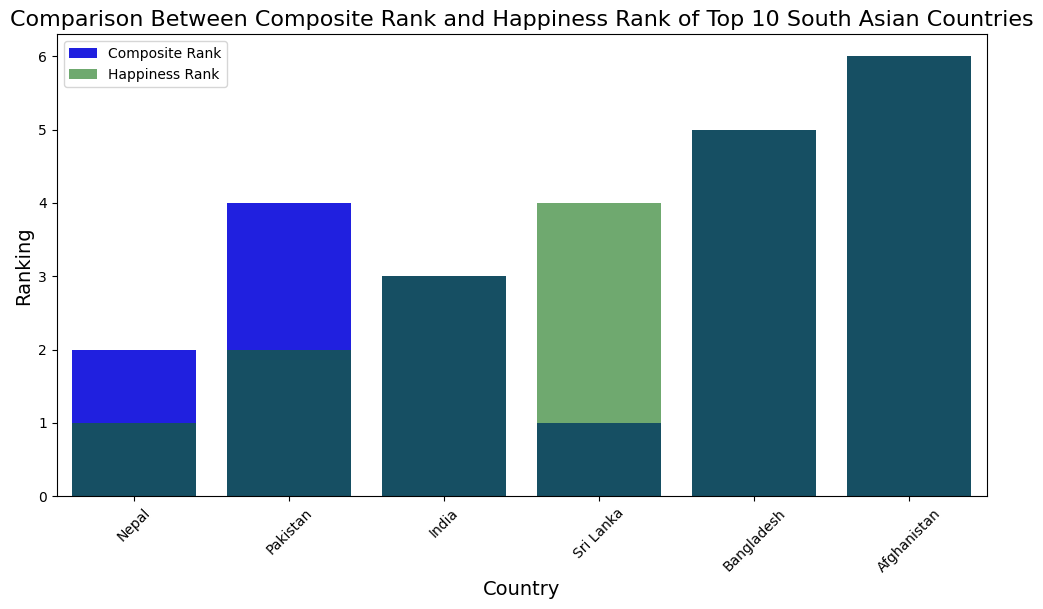

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add ranks based on the Composite score and Happiness score
south_asian_df.loc[:, 'Composite Rank'] = south_asian_df['Composite score'].rank(ascending=False)
south_asian_df.loc[:, 'Happiness Rank'] = south_asian_df['score'].rank(ascending=False)

top_countries = south_asian_df[['Country name', 'Composite Rank', 'Happiness Rank']]

top_countries = top_countries.head(10)

# Plotting the comparison between Composite Rank and Happiness Rank
plt.figure(figsize=(12, 6))

sns.barplot(x='Country name', y='Composite Rank', data=top_countries, color='b', label='Composite Rank')

sns.barplot(x='Country name', y='Happiness Rank', data=top_countries, color='g', alpha=0.6, label='Happiness Rank')

plt.title('Comparison Between Composite Rank and Happiness Rank of Top 10 South Asian Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Ranking', fontsize=14)

plt.xticks(rotation=45)

plt.legend()

plt.show()

Task - 3 - Outlier Detection:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [ ]:
Q1_composite = south_asian_df['Composite score'].quantile(0.25)
Q3_composite = south_asian_df['Composite score'].quantile(0.75)
IQR_composite = Q3_composite - Q1_composite

Q1_gdp = south_asian_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

lower_bound_composite = Q1_composite - 1.5 * IQR_composite
upper_bound_composite = Q3_composite + 1.5 * IQR_composite

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

outliers_composite = south_asian_df[(south_asian_df['Composite score'] < lower_bound_composite) |
                                    (south_asian_df['Composite score'] > upper_bound_composite)]

outliers_gdp = south_asian_df[(south_asian_df['Log GDP per capita'] < lower_bound_gdp) |
                              (south_asian_df['Log GDP per capita'] > upper_bound_gdp)]

print("Outliers based on Composite Score:")
print(outliers_composite[['Country name', 'Composite score']])

print("\nOutliers based on GDP per Capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])



Outliers based on Composite Score:
    Country name  Composite score
127    Sri Lanka           1.0739
142  Afghanistan           0.3238

Outliers based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


2. Define outliers using the 1.5 × IQR rule.

The 1.5*IQR rule is the most common way of identifying the outliner in the dataset.It uses the inter-quartile range to define the reange between which the data should lie on.
 Ways to identify outliner: sss
    1. IQR= Q3-Q1
              where, Q3= Third quartile
                     Q1= First quartile
    2. finding out the upper bond and the lower bond
         upper bond: Q1+ 1.5*IQR
         lower bond: Q1- 1.5*IQR
    3. The data lying below and above the lower bond and upperbond are the outliners.

Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

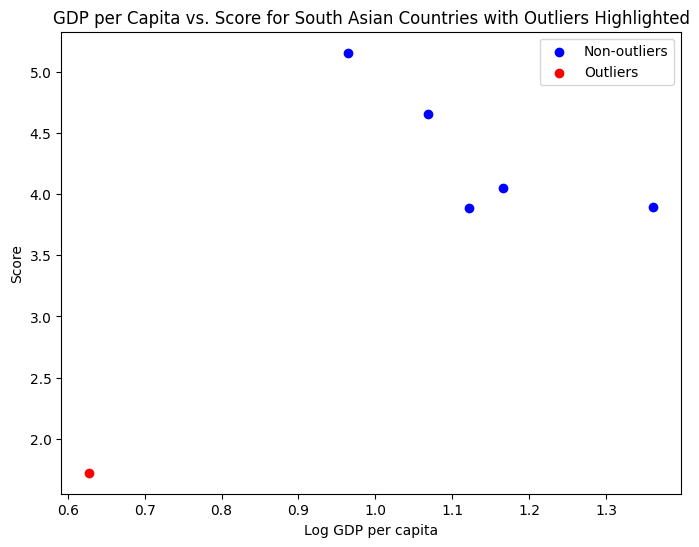

Outlier Countries:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


In [36]:

south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
df_south_asia = df[df['Country name'].isin(south_asian_countries)].copy()

# Calculate the IQR for the 'score' column to detect outliers
Q1 = df_south_asia['score'].quantile(0.25)
Q3 = df_south_asia['score'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Add a column to indicate whether the 'score' is an outlier
df_south_asia.loc[:, 'Outlier'] = (df_south_asia['score'] < lower_bound) | (df_south_asia['score'] > upper_bound)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for non-outliers
plt.scatter(df_south_asia[df_south_asia['Outlier'] == False]['Log GDP per capita'],
            df_south_asia[df_south_asia['Outlier'] == False]['score'],
            color='blue', label='Non-outliers')

# Scatter plot for outliers
plt.scatter(df_south_asia[df_south_asia['Outlier'] == True]['Log GDP per capita'],
            df_south_asia[df_south_asia['Outlier'] == True]['score'],
            color='red', label='Outliers')

# Add labels and title
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('GDP per Capita vs. Score for South Asian Countries with Outliers Highlighted')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Display outlier countries
outlier_countries = df_south_asia[df_south_asia['Outlier'] == True]
print("Outlier Countries:")
print(outlier_countries[['Country name', 'Log GDP per capita', 'score']].head(5))


**Discuss the characteristics of these outliers and their potential impact on regional averages.**

Answer :
When identifying outliers in data, it’s essential to understand their characteristics and the potential impact they may have on regional averages.

**Characteristics of outliner**  :
Outliers in this context are countries whose GDP per capita and score significantly differ from most others in the South Asian region.Outliers with very high GDP per capita might be advanced economies with substantial wealth and strong economic structures. Outliers with very low GDP per capita might face significant economic challenges such as poverty, limited access to healthcare, or instability.

**Potential Impact on Regional Averages** :

Impact on Mean  :High GDP per Capita Outliers: Countries with very high GDP per capita can inflate the regional average.Low GDP per Capita Outliers: Conversely, if there are countries with significantly lower GDP per capita, they could depress the regional average.

Impact on Score : High Score Outliers: Countries with higher scores  could raise the regional average score, making the region seem more successful in terms of happiness, health, or other metrics, even if the majority of countries are below that level.
Impact on Score : High Score Outliers: Countries with higher scores  could raise the regional average score, making the region seem more successful in terms of happiness, health, or other metrics, even if the majority of countries are below that level.


Task - 4 - Exploring Trends Across Metrics :

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

df_south_asia = df[df['Country name'].isin(south_asian_countries)].copy()

df_south_asia = df_south_asia[['Country name', 'score', 'Log GDP per capita', 'Generosity']]

def pearson_correlation(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)
    sum_y2 = np.sum(y**2)

    numerator = n * sum_xy - sum_x * sum_y
    denominator = np.sqrt((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))

    return numerator / denominator

corr_freedom = pearson_correlation(df_south_asia['score'], df_south_asia['Log GDP per capita'])

corr_generosity = pearson_correlation(df_south_asia['score'], df_south_asia['Generosity'])

print(f"Pearson correlation between Score and Log GDP per capita: {corr_freedom:.2f}")
print(f"Pearson correlation between Score and Generosity: {corr_generosity:.2f}")

Pearson correlation between Score and Log GDP per capita: 0.58
Pearson correlation between Score and Generosity: 0.87


2. Create scatter plots with trendlines for these metrics against the Score.

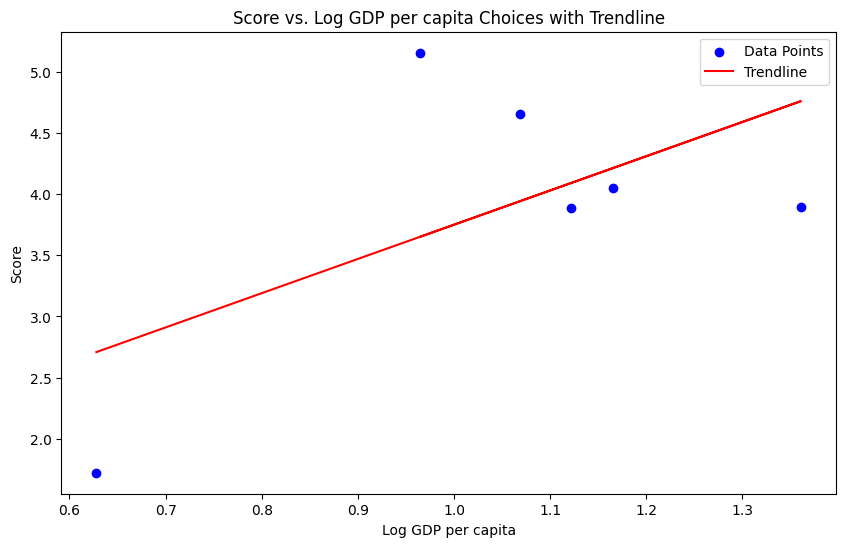

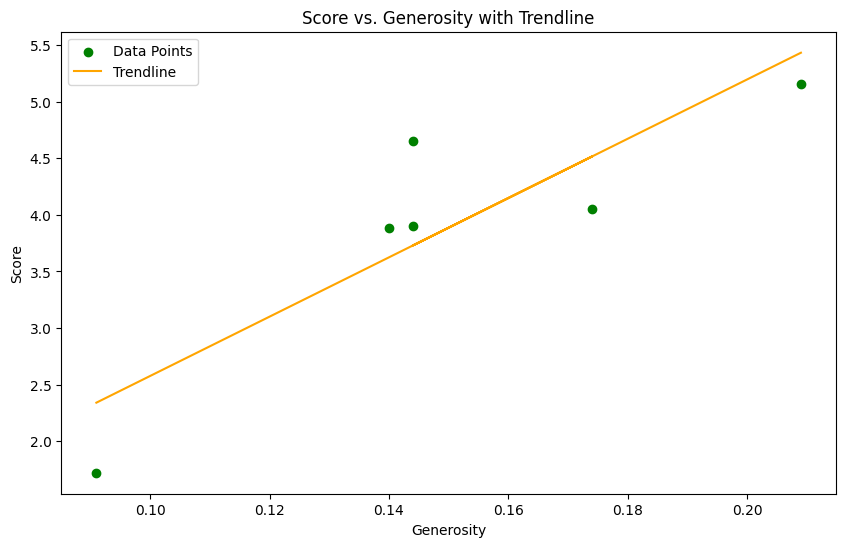

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

df_south_asia = df[df['Country name'].isin(south_asian_countries)].copy()

df_south_asia = df_south_asia[['Country name', 'score', 'Log GDP per capita', 'Generosity']]

plt.figure(figsize=(10, 6))

plt.scatter(df_south_asia['Log GDP per capita'], df_south_asia['score'], color='blue', label='Data Points')

slope_freedom, intercept_freedom = np.polyfit(df_south_asia['Log GDP per capita'], df_south_asia['score'], 1)
trendline_freedom = slope_freedom * df_south_asia['Log GDP per capita'] + intercept_freedom

plt.plot(df_south_asia['Log GDP per capita'], trendline_freedom, color='red', label='Trendline')

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Score vs. Log GDP per capita Choices with Trendline')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))


plt.scatter(df_south_asia['Generosity'], df_south_asia['score'], color='green', label='Data Points')

slope_generosity, intercept_generosity = np.polyfit(df_south_asia['Generosity'], df_south_asia['score'], 1)
trendline_generosity = slope_generosity * df_south_asia['Generosity'] + intercept_generosity

plt.plot(df_south_asia['Generosity'], trendline_generosity, color='orange', label='Trendline')

plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Score vs. Generosity with Trendline')
plt.legend()

plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Answer:  Identify the strongest and weakest relationships between the various metrics and the "Score" for South Asian countries, I would need to know what specific metrics you're referring to (e.g., GDP, education index, healthcare quality, political stability, etc.). The "Score" could relate to a variety of composite indexes, such as Human Development Index (HDI), Economic Freedom Score, or others.

If you could provide more details on the metrics you're considering and clarify what the "Score" represents, I would be able to offer a more targeted and informed analysis of the strongest and weakest correlations.

Task - 5 - Gap Analysis:

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
    'Nepal', 'Pakistan', 'Sri Lanka'
]

#
df_south_asia = df[df['Country name'].isin(south_asian_countries)].copy()

df_south_asia.loc[:, 'Log GDP per capita'] = pd.to_numeric(df_south_asia['Log GDP per capita'], errors='coerce')
df_south_asia.loc[:, 'score'] = pd.to_numeric(df_south_asia['score'], errors='coerce')

df_south_asia.loc[:, 'GDP-Score Gap'] = df_south_asia['Log GDP per capita'] - df_south_asia['score']

print("Updated South Asian Dataset with GDP-Score Gap:")
print(df_south_asia)

df_south_asia.to_csv("south_asian_countries_gdp_score_gap.csv", index=False)



Updated South Asian Dataset with GDP-Score Gap:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0

2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
    'Nepal', 'Pakistan', 'Sri Lanka'
]

df_south_asia = df[df['Country name'].isin(south_asian_countries)].copy()

df_south_asia.loc[:, 'Log GDP per capita'] = pd.to_numeric(df_south_asia['Log GDP per capita'], errors='coerce')
df_south_asia.loc[:, 'score'] = pd.to_numeric(df_south_asia['score'], errors='coerce')

df_south_asia.loc[:, 'GDP-Score Gap'] = df_south_asia['Log GDP per capita'] - df_south_asia['score']

df_south_asia_ascending = df_south_asia.sort_values(by='GDP-Score Gap', ascending=True)

df_south_asia_descending = df_south_asia.sort_values(by='GDP-Score Gap', ascending=False)

print("Ranked South Asian Countries by GDP-Score Gap (Ascending):")
print(df_south_asia_ascending[['Country name', 'GDP-Score Gap']])

print("\nRanked South Asian Countries by GDP-Score Gap (Descending):")
print(df_south_asia_descending[['Country name', 'GDP-Score Gap']])

df_south_asia_ascending.to_csv("south_asian_countries_gdp_score_gap_ascending.csv", index=False)
df_south_asia_descending.to_csv("south_asian_countries_gdp_score_gap_descending.csv", index=False)

Ranked South Asian Countries by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Ranked South Asian Countries by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

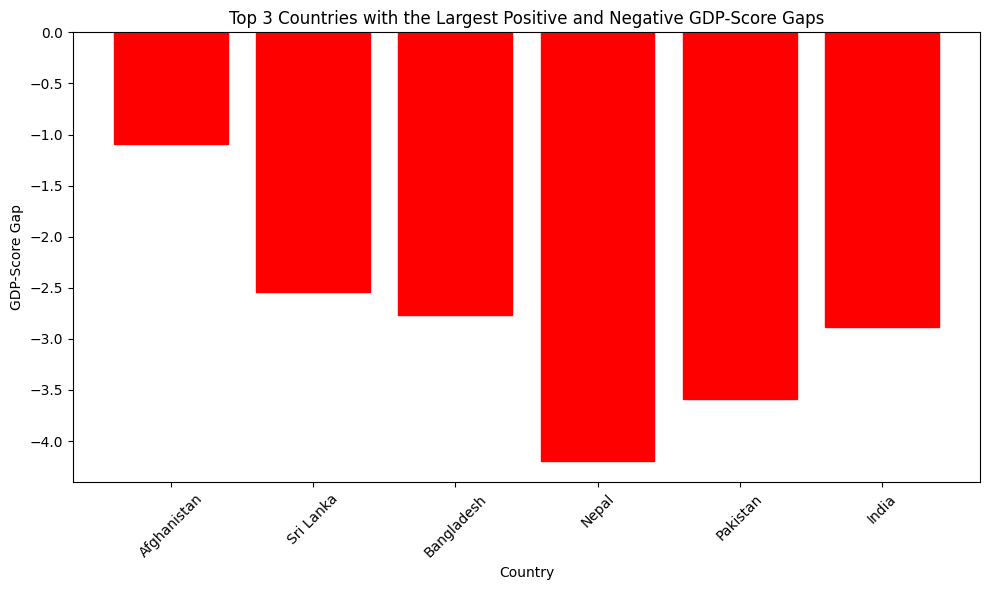

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
    'Nepal', 'Pakistan', 'Sri Lanka'
]

df_south_asia = df[df['Country name'].isin(south_asian_countries)].copy()

df_south_asia.loc[:, 'Log GDP per capita'] = pd.to_numeric(df_south_asia['Log GDP per capita'], errors='coerce')
df_south_asia.loc[:, 'score'] = pd.to_numeric(df_south_asia['score'], errors='coerce')

df_south_asia.loc[:, 'GDP-Score Gap'] = df_south_asia['Log GDP per capita'] - df_south_asia['score']

top_3_positive_gap = df_south_asia.sort_values(by='GDP-Score Gap', ascending=False).head(3)
top_3_negative_gap = df_south_asia.sort_values(by='GDP-Score Gap', ascending=True).head(3)

highlighted_countries = pd.concat([top_3_positive_gap[['Country name' , 'GDP-Score Gap']], top_3_negative_gap[['Country name', 'GDP-Score Gap']]])

plt.figure(figsize=(10, 6))
bars = plt.bar(highlighted_countries['Country name'], highlighted_countries['GDP-Score Gap'], color=['green']*3 + ['red']*3)

for bar in bars:
    if bar.get_height() < 0:
        bar.set_color('red')
    else:
        bar.set_color('green')

plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Answer

We observe that the GDP-Score Gap for most South Asian countries is negative, meaning that their social scores are higher relative to their GDP per capita.

Nepal:

Nepal has a high score for social support (0.990), but its GDP per capita remains low (0.965). This indicates that public policies might be effectively focused on ensuring access to healthcare, education, and basic needs despite economic challenges.

Implementation: While Nepal's social outcomes may be commendable, its low economic growth makes it vulnerable to external economic shocks and may undermine long-term progress in social sectors.

Pakistan:

Weak Social Support Systems: Despite a moderate social support score (0.600), Pakistan's GDP per capita is still relatively low (1.069). This suggests that social policies may not be effectively reaching the majority of the population. Corruption, poor governance, and inefficient allocation of resources in social sectors such as healthcare and education could be contributing to this gap.

Implementation: Pakistan’s negative GDP-Score gap could indicate a growing inequality between economic growth and social development. The lack of effective public service delivery and widespread poverty can lead to social unrest and political instability.

Similarly with other south aisain countries.


**Problem - 3 - Comparative Analysis:**

Descriptive Statistics:
Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                            "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]

south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print("South Asia - Mean Score:", south_asia_mean)
print("South Asia - Standard Deviation of Score:", south_asia_std)

print("\nMiddle East - Mean Score:", middle_east_mean)
print("Middle East - Standard Deviation of Score:", middle_east_std)

South Asia - Mean Score: 3.895666666666667
South Asia - Standard Deviation of Score: 1.1770690152521504

Middle East - Mean Score: 5.412100000000001
Middle East - Standard Deviation of Score: 1.5662011684327144


Which region has higher happiness Scores on average?

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                            "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]

south_asia_mean_score = south_asia_df['score'].mean()
middle_east_mean_score = middle_east_df['score'].mean()

if south_asia_mean_score > middle_east_mean_score:
    print("South Asia has a higher average happiness score:", south_asia_mean_score)
    print("Middle East has an average happiness score of:", middle_east_mean_score)
else:
    print("Middle East has a higher average happiness score:", middle_east_mean_score)
    print("South Asia has an average happiness score of:", south_asia_mean_score)

Middle East has a higher average happiness score: 5.412100000000001
South Asia has an average happiness score of: 3.895666666666667


**Top and Bottom Performers:**
Identify the top 3 and bottom 3 countries in each region based on the score.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                            "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]

south_asia_top3 = south_asia_df.sort_values('score', ascending=False).head(3)
south_asia_bottom3 = south_asia_df.sort_values('score', ascending=True).head(3)

middle_east_top3 = middle_east_df.sort_values('score', ascending=False).head(3)
middle_east_bottom3 = middle_east_df.sort_values('score', ascending=True).head(3)

print("South Asia - Top 3 Countries based on Score:")
print(south_asia_top3[['Country name', 'score']])
south_asia_top3[['Country name', 'score']].head(3)

print("\nSouth Asia - Bottom 3 Countries based on Score:")
print(south_asia_bottom3[['Country name', 'score']])
south_asia_bottom3[['Country name', 'score']].head(3)

print("\nMiddle East - Top 3 Countries based on Score:")
print(middle_east_top3[['Country name', 'score']])
middle_east_top3[['Country name', 'score']].head(3)

print("\nMiddle East - Bottom 3 Countries based on Score:")
middle_east_bottom3[['Country name', 'score']].head(3)

South Asia - Top 3 Countries based on Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia - Bottom 3 Countries based on Score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Middle East - Top 3 Countries based on Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3 Countries based on Score:


,Country name,score
141,Lebanon,2.707
132,Yemen,3.561
124,Jordan,4.186


Plot bar charts comparing these charts.

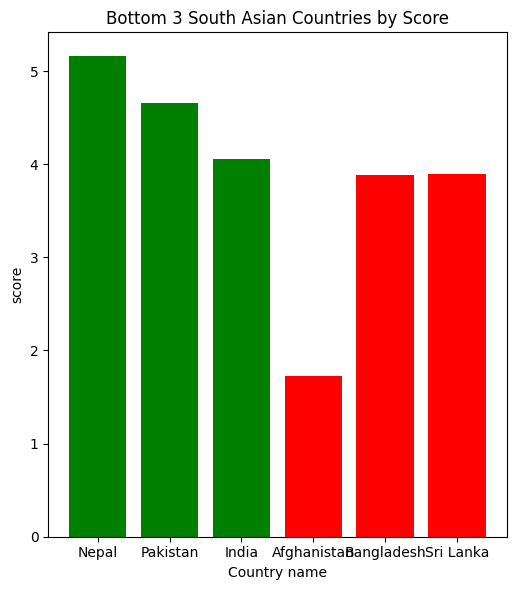

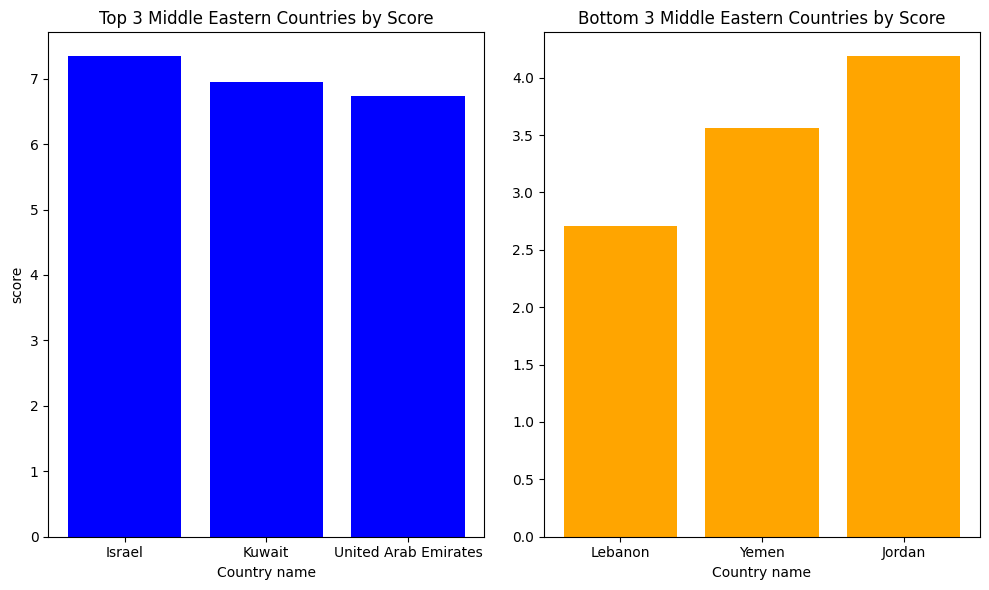

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                            "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]

south_asia_top3 = south_asia_df.sort_values('score', ascending=False).head(3)
south_asia_bottom3 = south_asia_df.sort_values('score', ascending=True).head(3)

middle_east_top3 = middle_east_df.sort_values('score', ascending=False).head(3)
middle_east_bottom3 = middle_east_df.sort_values('score', ascending=True).head(3)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(south_asia_top3['Country name'], south_asia_top3['score'], color='green')
plt.title('Top 3 South Asian Countries by Score')
plt.xlabel('Country name')
plt.ylabel('score')

plt.bar(south_asia_bottom3['Country name'], south_asia_bottom3['score'], color='red')
plt.title('Bottom 3 South Asian Countries by Score')
plt.xlabel('Country name')
plt.ylabel('score')

plt.tight_layout()

plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(middle_east_top3['Country name'], middle_east_top3['score'], color='blue')
plt.title('Top 3 Middle Eastern Countries by Score')
plt.xlabel('Country name')
plt.ylabel('score')

plt.subplot(1, 2, 2)
plt.bar(middle_east_bottom3['Country name'], middle_east_bottom3['score'], color='orange')
plt.title('Bottom 3 Middle Eastern Countries by Score')
plt.xlabel('Country name')

plt.tight_layout()

plt.show()

**Metric Comparisons:** Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

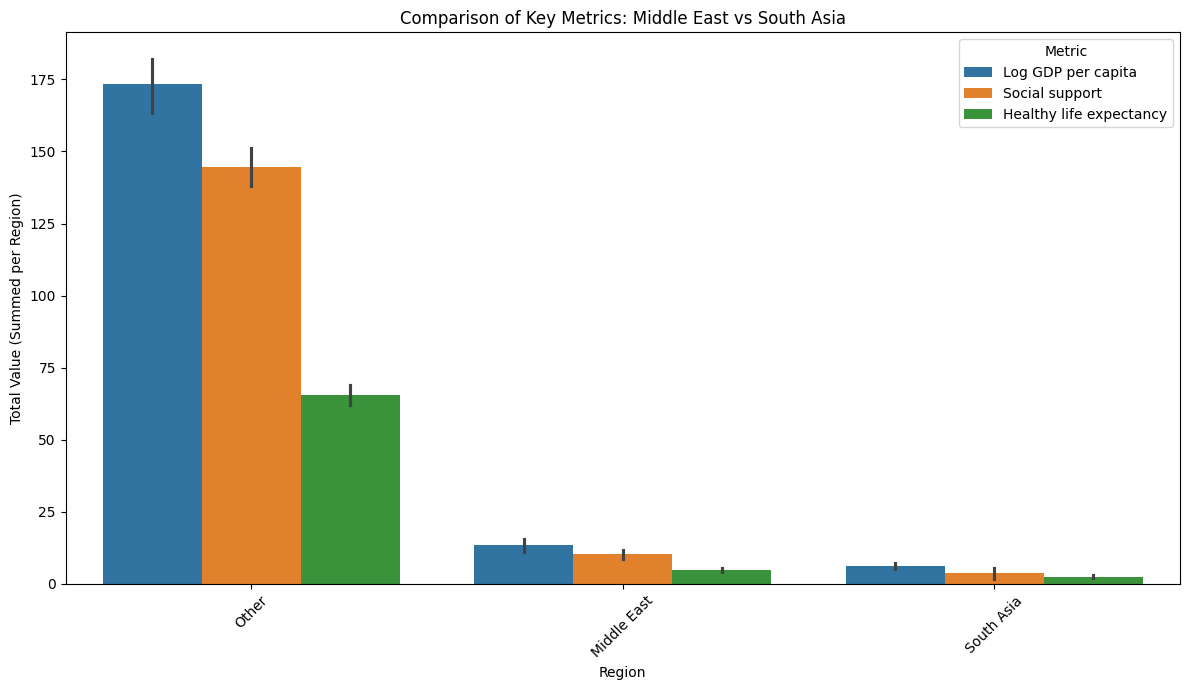

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of Middle Eastern and South Asian countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
]

# Load the data
df = pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

# Function to assign region
def assign_region(country):
    if country in middle_east_countries:
        return 'Middle East'
    elif country in south_asia_countries:
        return 'South Asia'
    else:
        return 'Other'

# Apply the region assignment function
df['Region'] = df['Country name'].apply(assign_region)

# Melt the dataframe for plotting
df_melted = df.melt(id_vars=['Country name', 'Region'],
                    value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'],
                    var_name='Metric',
                    value_name='Value')

# Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Region', y='Value', hue='Metric', data=df_melted, estimator=sum)

# Add titles and labels
plt.title('Comparison of Key Metrics: Middle East vs South Asia')
plt.xlabel('Region')
plt.ylabel('Total Value (Summed per Region)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Which metrics show the largest disparity between the two regions?

To determine which metrics show the largest disparity between the Middle East and South Asia, we can calculate the differences in the summed values of each metric between the two regions. This approach will help identify which metric has the largest difference.

Region                   Difference
Metric                             
Healthy life expectancy       2.465
Log GDP per capita            7.156
Social support                6.704


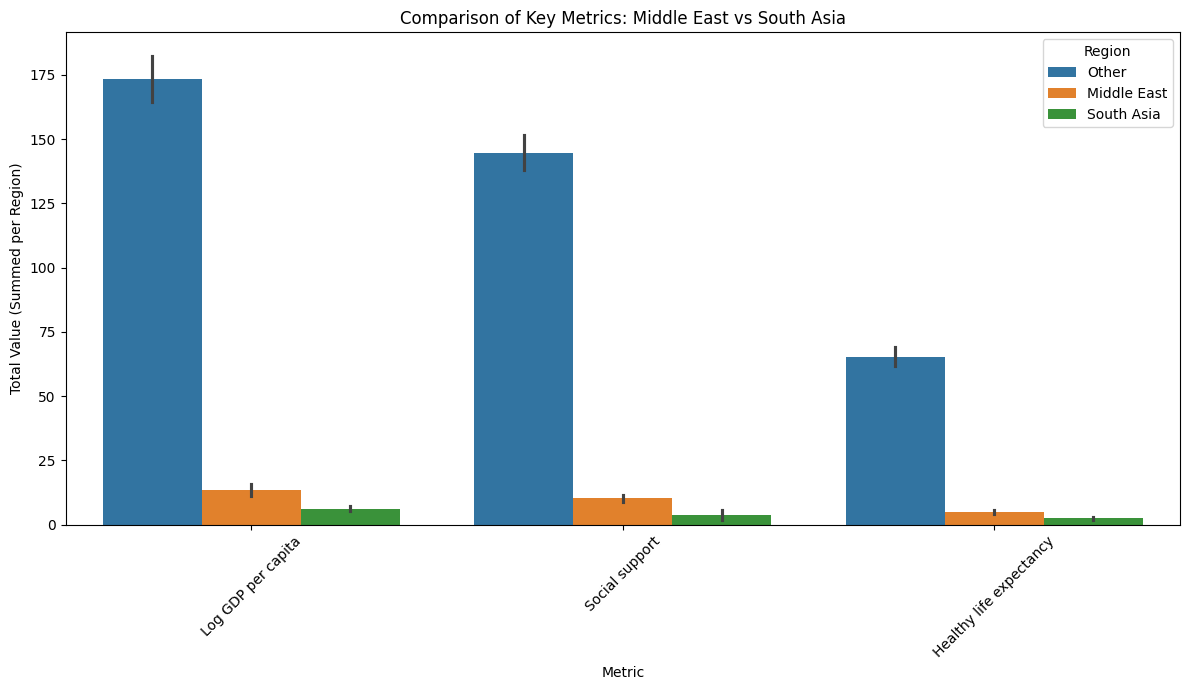

In [38]:

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
]

# Loading the data
df = pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')
def assign_region(country):
    if country in middle_east_countries:
        return 'Middle East'
    elif country in south_asia_countries:
        return 'South Asia'
    else:
        return 'Other'

# Apply the region assignment function
df['Region'] = df['Country name'].apply(assign_region)

# Melt the dataframe for plotting
df_melted = df.melt(id_vars=['Country name', 'Region'],
                    value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'],
                    var_name='Metric',
                    value_name='Value')

# Summarize the total values per region and metric
region_summary = df_melted.groupby(['Region', 'Metric'])['Value'].sum().reset_index()

# Pivot the summary to calculate the differences
region_pivot = region_summary.pivot(index='Metric', columns='Region', values='Value')

region_pivot['Difference'] = region_pivot['Middle East'] - region_pivot['South Asia']

print(region_pivot[['Difference']])

# Visualizing the comparison
plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Value', hue='Region', data=df_melted, estimator=sum)

plt.title('Comparison of Key Metrics: Middle East vs South Asia')
plt.xlabel('Metric')
plt.ylabel('Total Value (Summed per Region)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Happiness Disparity:** Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

def compute_range_and_cv(region_df):
    score_values = region_df['score']

    score_range = score_values.max() - score_values.min()

    mean_score = score_values.mean()
    std_dev_score = score_values.std()
    cv = std_dev_score / mean_score * 100 if mean_score != 0 else np.nan

    return score_range, cv

middle_east_range, middle_east_cv = compute_range_and_cv(middle_east_df)

south_asian_range, south_asian_cv = compute_range_and_cv(south_asian_df)

print("Middle East Region - Range:", middle_east_range, "CV:", middle_east_cv)
print("South Asian Region - Range:", south_asian_range, "CV:", south_asian_cv)

Middle East Region - Range: 4.634 CV: 28.938880812119404
South Asian Region - Range: 3.4370000000000003 CV: 30.21482883337427


Which region has greater variability in happiness?

Answer:

To check the variability first we need to find the C.V for both the reason.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

def compute_range_and_cv(region_df):
    score_values = region_df['score']

    score_range = score_values.max() - score_values.min()

    mean_score = score_values.mean()
    std_dev_score = score_values.std()
    cv = std_dev_score / mean_score * 100 if mean_score != 0 else np.nan

    return score_range, cv

middle_east_range, middle_east_cv = compute_range_and_cv(middle_east_df)

south_asian_range, south_asian_cv = compute_range_and_cv(south_asian_df)

print("Middle East Region - Range:", middle_east_range, "CV:", middle_east_cv)
print("South Asian Region - Range:", south_asian_range, "CV:", south_asian_cv)

if middle_east_cv > south_asian_cv:
    print("The Middle East region has greater variability in happiness.")
else:
    print("The South Asian region has greater variability in happiness.")


Middle East Region - Range: 4.634 CV: 28.938880812119404
South Asian Region - Range: 3.4370000000000003 CV: 30.21482883337427
The South Asian region has greater variability in happiness.


**Correlation Analysis : **Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

def calculate_correlations(region_df):

    correlations = region_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

    return correlations

middle_east_correlations = calculate_correlations(middle_east_df)

south_asian_correlations = calculate_correlations(south_asian_df)

print("Middle East Region - Correlation Matrix:")
middle_east_correlations.head(10)

print("\nSouth Asian Region - Correlation Matrix:")
south_asian_correlations.head(10)

Middle East Region - Correlation Matrix:

South Asian Region - Correlation Matrix:


,score,Freedom to make life choices,Generosity
score,1.000000,0.800519,0.874512
Freedom to make life choices,0.800519,1.000000,0.733396
Generosity,0.874512,0.733396,1.000000


Create scatter plots to visualize and interpret the relationships.

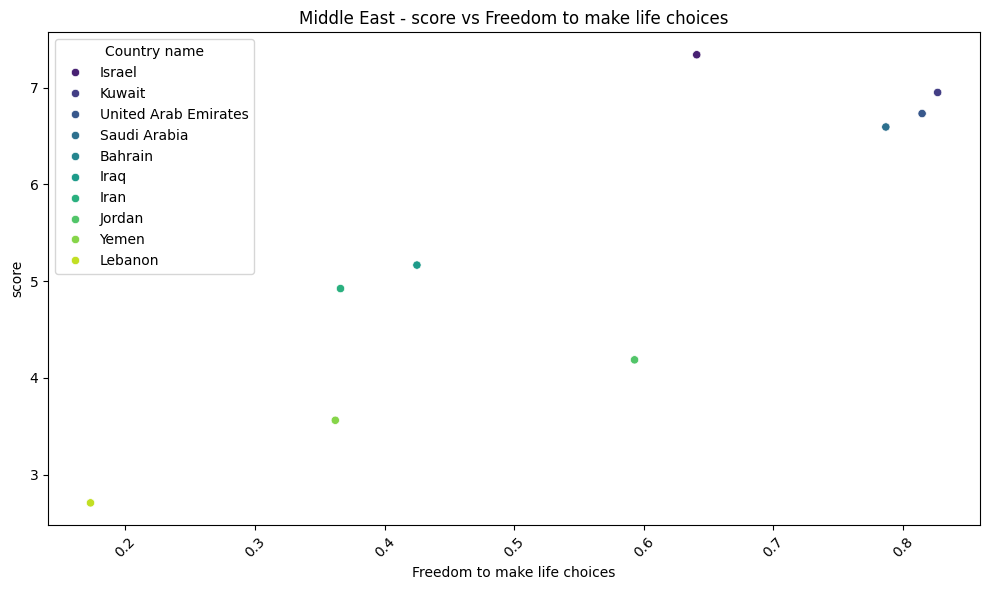

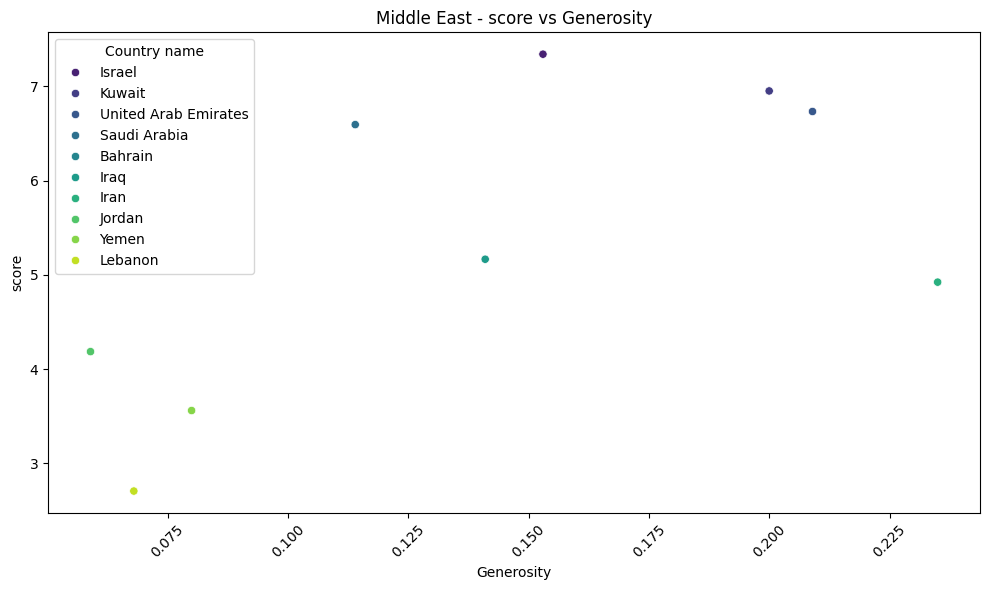

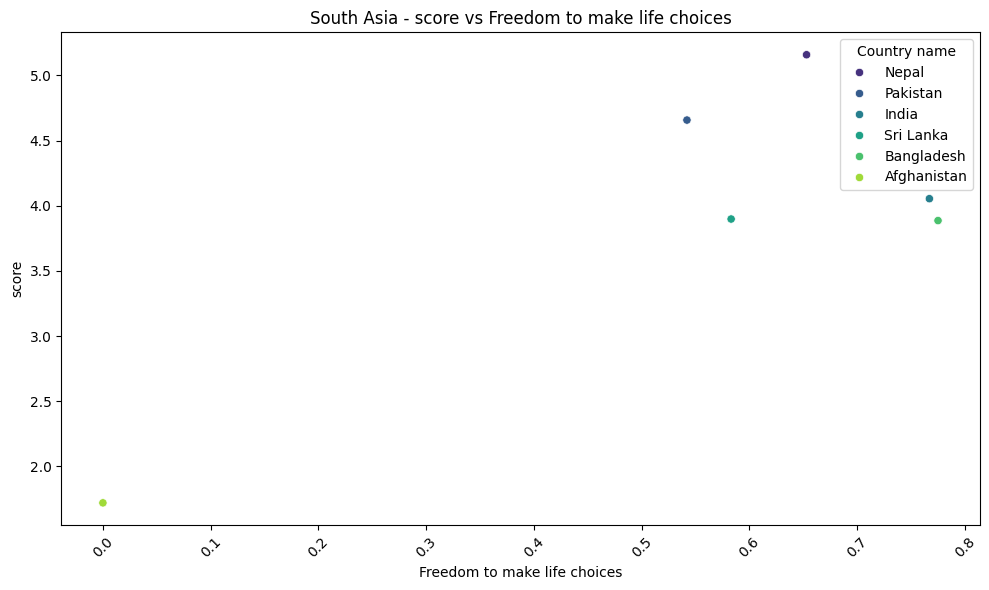

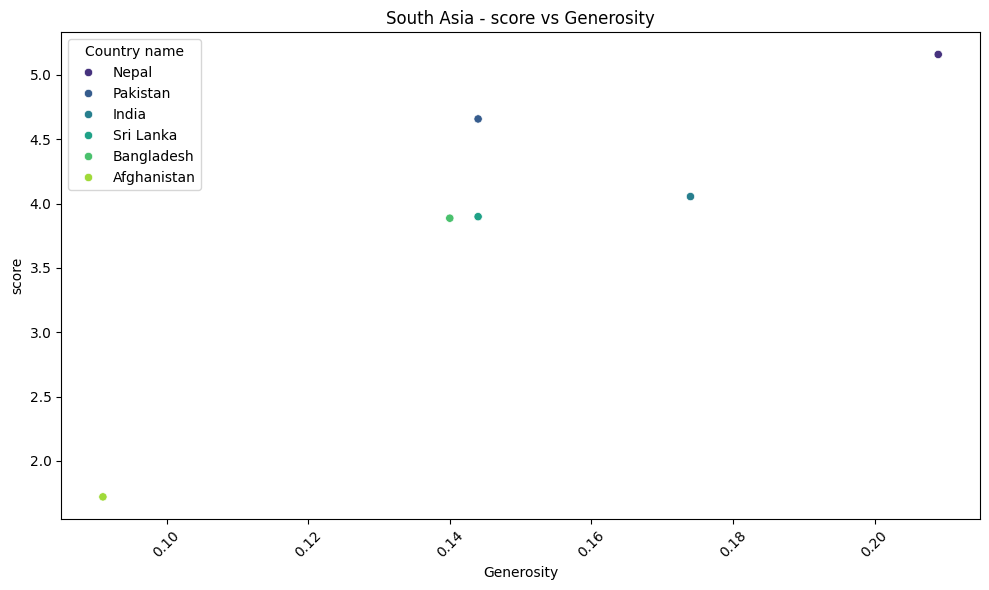

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

def create_scatter_plots(region_df, region_name):

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=region_df, x='Freedom to make life choices', y='score', hue='Country name', palette='viridis')
    plt.title(f'{region_name} - score vs Freedom to make life choices')
    plt.xlabel('Freedom to make life choices')
    plt.ylabel('score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=region_df, x='Generosity', y='score', hue='Country name', palette='viridis')
    plt.title(f'{region_name} - score vs Generosity')
    plt.xlabel('Generosity')
    plt.ylabel('score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

create_scatter_plots(middle_east_df, 'Middle East')

create_scatter_plots(south_asian_df, 'South Asia')

**Outlier Detection:** Identify outlier countries in both regions based on Score and GDP per Capita.

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

def identify_outliers(region_df, columns):
    outliers = {}
    for column in columns:
        Q1 = region_df[column].quantile(0.25)
        Q3 = region_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = region_df[(region_df[column] < lower_bound) | (region_df[column] > upper_bound)]
    return outliers

outliers_middle_east = identify_outliers(middle_east_df, ['score', 'Log GDP per capita'])
outliers_south_asian = identify_outliers(south_asian_df, ['score', 'Log GDP per capita'])

print("Middle East Region Outliers (score, Log GDP per capita):")
print(outliers_middle_east)


print("\nSouth Asian Region Outliers (score, Log GDP per capita):")
print(outliers_south_asian)


Middle East Region Outliers (score, Log GDP per capita):
{'score': Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual]
Index: [], 'Log GDP per capita': Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual]
Index: []}

South Asian Region Outliers (score, Log GDP per capita):
{'score':     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual  
142                      0.088                0.672  , 'Log GDP per capita':     Country name  

Plot these outliers and discuss their implications.

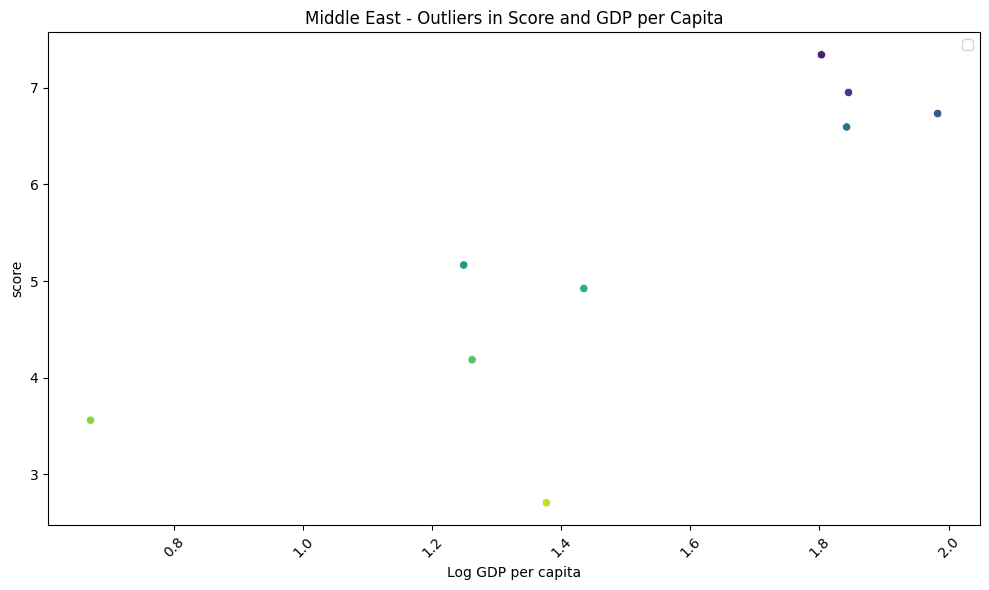

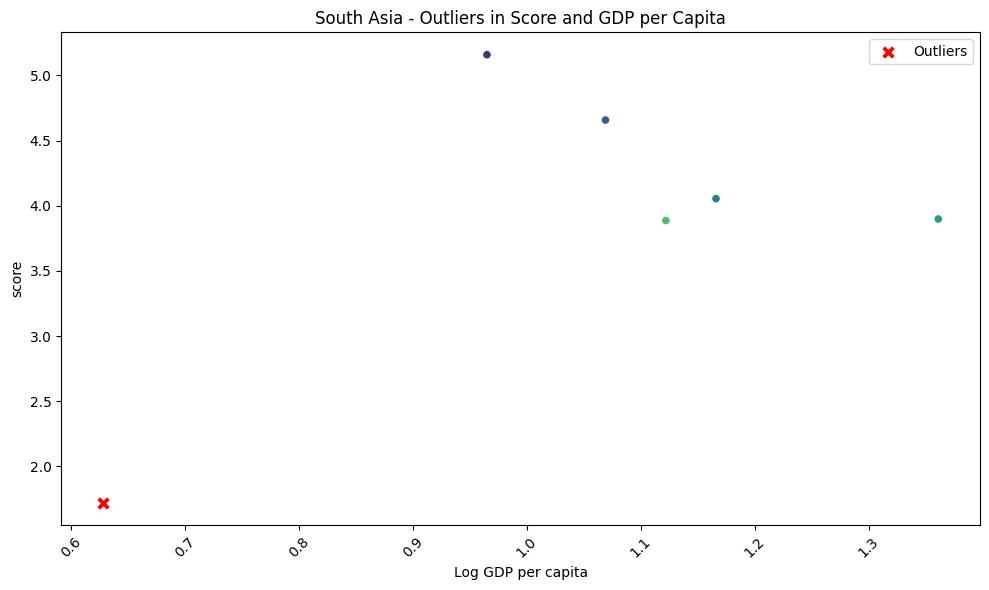

In [ ]:
pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

def identify_outliers(region_df, columns):
    outliers = {}
    for column in columns:
        Q1 = region_df[column].quantile(0.25)
        Q3 = region_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = region_df[(region_df[column] < lower_bound) | (region_df[column] > upper_bound)]
    return outliers

outliers_middle_east = identify_outliers(middle_east_df, ['score', 'Log GDP per capita'])
outliers_south_asian = identify_outliers(south_asian_df, ['score', 'Log GDP per capita'])

def plot_outliers(region_df, outliers, region_name):
    plt.figure(figsize=(10, 6))

    sns.scatterplot(data=region_df, x='Log GDP per capita', y='score', hue='Country name', palette='viridis', legend=None)
    sns.scatterplot(data=outliers['score'], x='Log GDP per capita', y='score', color='red', label='Outliers', s=100, marker='X')

    plt.title(f'{region_name} - Outliers in Score and GDP per Capita')
    plt.xlabel('Log GDP per capita')
    plt.ylabel('score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_outliers(middle_east_df, outliers_middle_east, 'Middle East')
plot_outliers(south_asian_df, outliers_south_asian, 'South Asia')


Implication :

For the indication of unusual Pattern

Potential areas for futher investigation

To know about the impact on average matrics.


**Visualization:**  Create boxplots comparing the distribution of Score between South Asia and the Middle East.

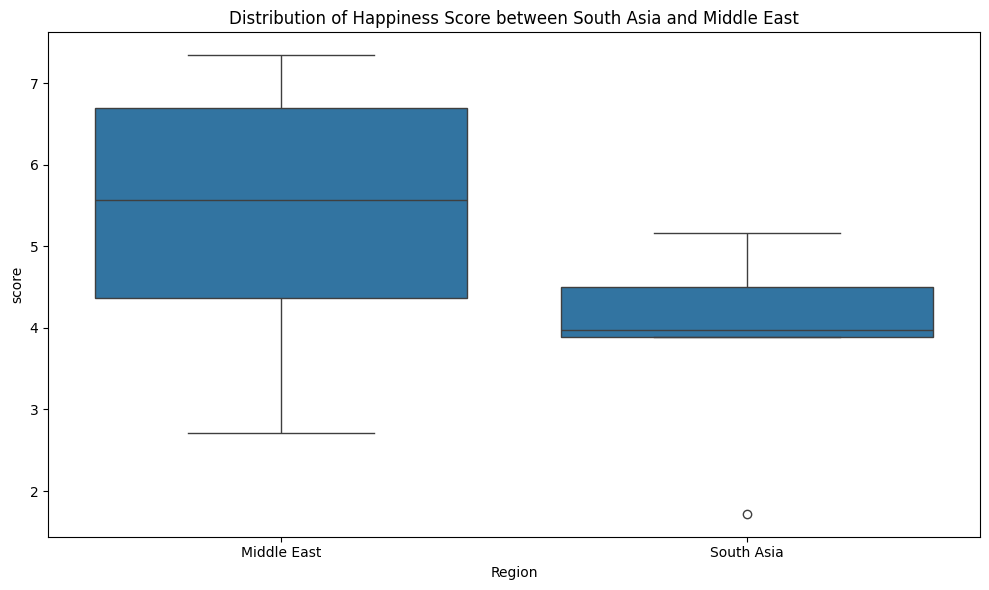

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/5CS037/WHR-2024-5CS037.csv')

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)].copy()
south_asian_df = df[df['Country name'].isin(south_asian_countries)].copy()

middle_east_df['Region'] = 'Middle East'
south_asian_df['Region'] = 'South Asia'


combined_df = pd.concat([middle_east_df, south_asian_df])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Distribution of Happiness Score between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('score')
plt.tight_layout()
plt.show()



Interpret the key differences in distribution shapes, medians, and outliers.

The distribution of middle east cou ntries data are more clustered than of south aisan countries where the median of the middle east countries are greater than the south asian and speaking of outliners, The outliner of middle east are less frequent than that of south aisa.